In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
# Read the CSV file with image file paths
csv_file = "CSV_datasetsix_vowel_dataset_with_class.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_file)

df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,255,255,254,255,255,255,252,255,255,255,...,255,255,255,255,255,255,255,255,255,1
1,255,255,254,255,255,254,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
2,255,254,255,255,255,255,254,255,254,255,...,255,255,255,255,255,255,255,255,255,1
3,254,255,255,255,254,255,255,255,254,255,...,255,255,255,255,255,255,255,255,255,1
4,254,255,255,253,255,255,255,254,255,255,...,255,255,255,255,255,255,255,255,255,1
5,255,255,255,255,253,255,255,253,252,255,...,255,255,255,255,255,255,255,255,255,1
6,255,255,255,253,255,255,254,255,255,254,...,255,255,255,255,255,255,255,255,255,1
7,255,255,255,254,254,255,255,255,254,254,...,255,255,255,255,255,255,255,255,255,1
8,255,252,255,255,255,255,255,255,255,252,...,255,255,255,255,255,255,255,255,255,1
9,255,254,255,253,255,253,255,254,255,255,...,255,255,255,255,255,255,255,255,255,1


In [2]:
df.shape

(1200, 785)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 785 entries, pixel0 to class
dtypes: int64(785)
memory usage: 7.2 MB


In [4]:
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.000000
mean,254.710000,254.670833,254.441667,254.477500,254.455000,254.686667,254.584167,254.777500,254.630000,254.377500,...,254.698333,254.945833,254.935000,254.828333,254.709167,255.0,254.999167,254.998333,254.996667,3.500000
std,0.666786,0.766794,7.363318,7.389745,7.136087,0.734124,0.891765,0.553699,0.668435,1.621373,...,7.385309,0.328617,0.384141,3.968878,7.255696,0.0,0.028868,0.057735,0.115470,1.708537
min,251.000000,250.000000,1.000000,0.000000,9.000000,251.000000,249.000000,251.000000,252.000000,211.000000,...,2.000000,251.000000,251.000000,118.000000,4.000000,255.0,254.000000,253.000000,251.000000,1.000000
25%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,2.000000
50%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,3.500000
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,5.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,6.000000


In [5]:
df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
class       0
Length: 785, dtype: int64

In [6]:
x = df.drop('pixel0', axis = 1)
y = df['pixel0']

In [7]:
# we are reshaping the train & test image data so that they can be displayed as an image, 
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)


Train Data Shape: (960, 28, 28)
Test Data Shape: (240, 28, 28)


In [8]:
# Extract the labels (classes)
labels = df['class']

# Extract the pixel values and reshape them into images
features = df.drop(columns=['class']).values  # Remove the 'class' column
image_size = (28, 28)  # Adjust the image size based on your data

# Reshape the pixel values into images
images = features.reshape(-1, *image_size)

# Print the shapes of the features and labels arrays
print("Features shape:", features.shape)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Features shape: (1200, 784)
Images shape: (1200, 28, 28)
Labels shape: (1200,)


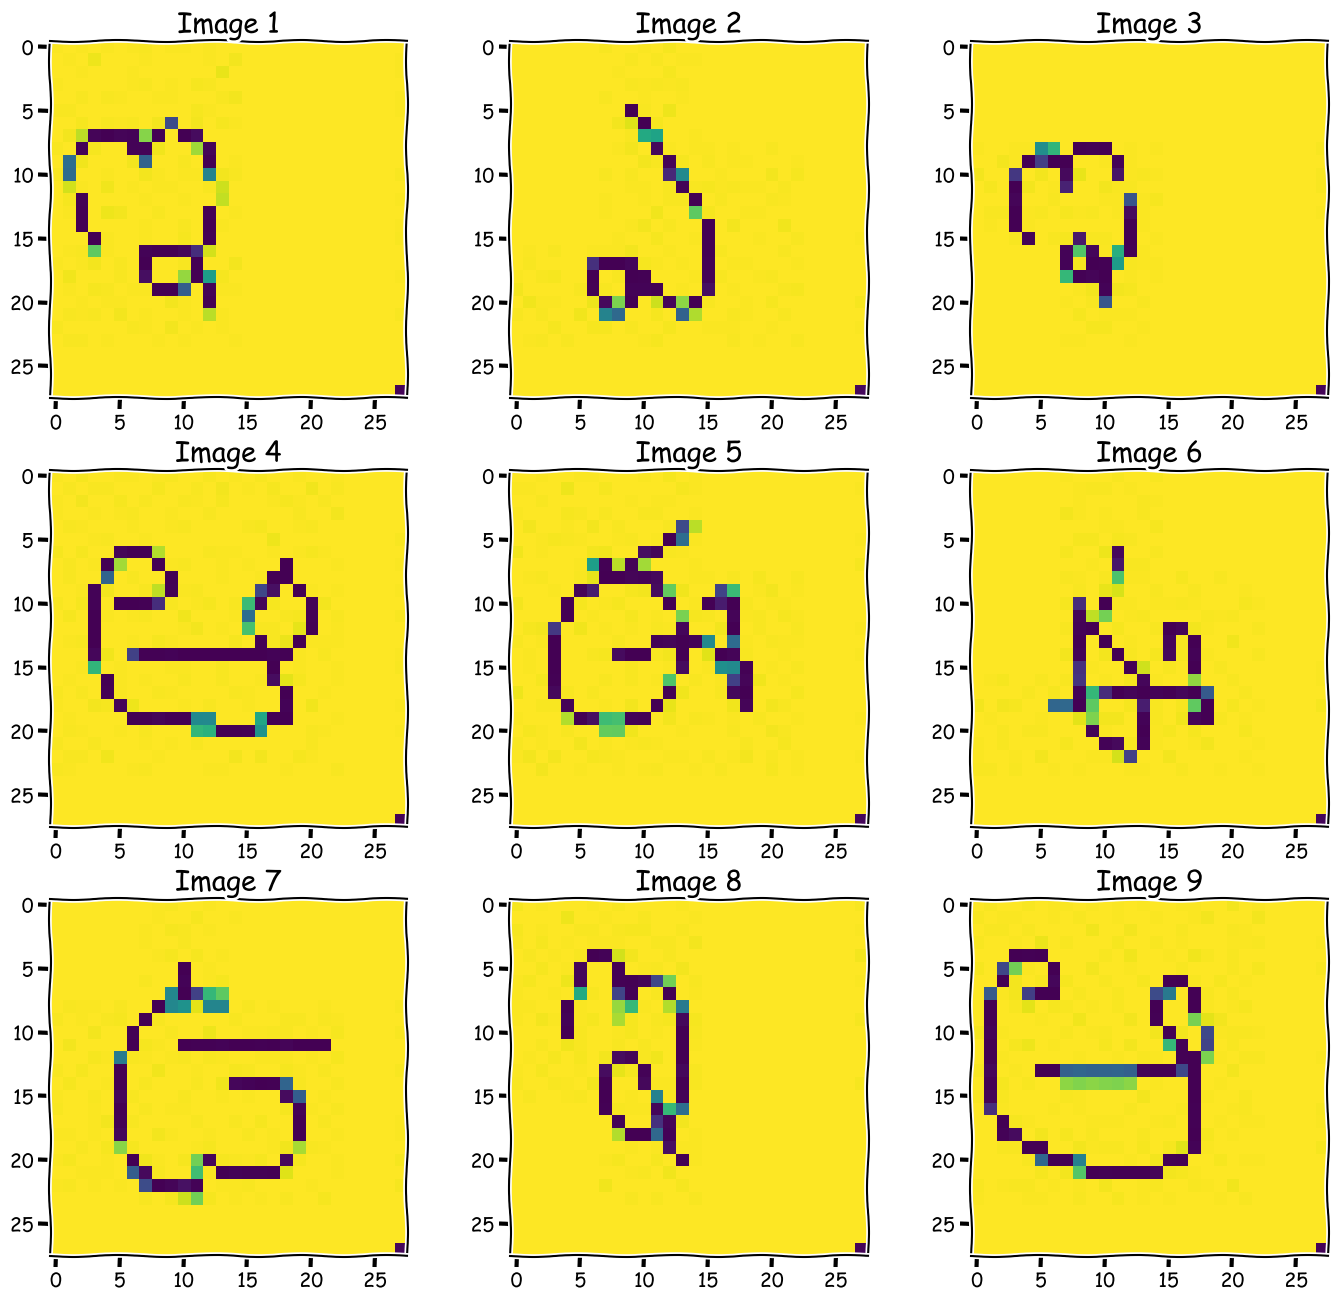

In [9]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

plt.style.use('fivethirtyeight')
plt.xkcd()

shuff = shuffle(x_train[:100])  # Assuming you have defined x_train

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(shuff[i])
    axes[i].set_title(f"Image {i+1}")
        
plt.show()


In [10]:
# New shape of train data: (960, 28, 28, 1)
# New shape of test data: (240, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)


New shape of train data: (960, 28, 28, 1)
New shape of test data: (240, 28, 28, 1)


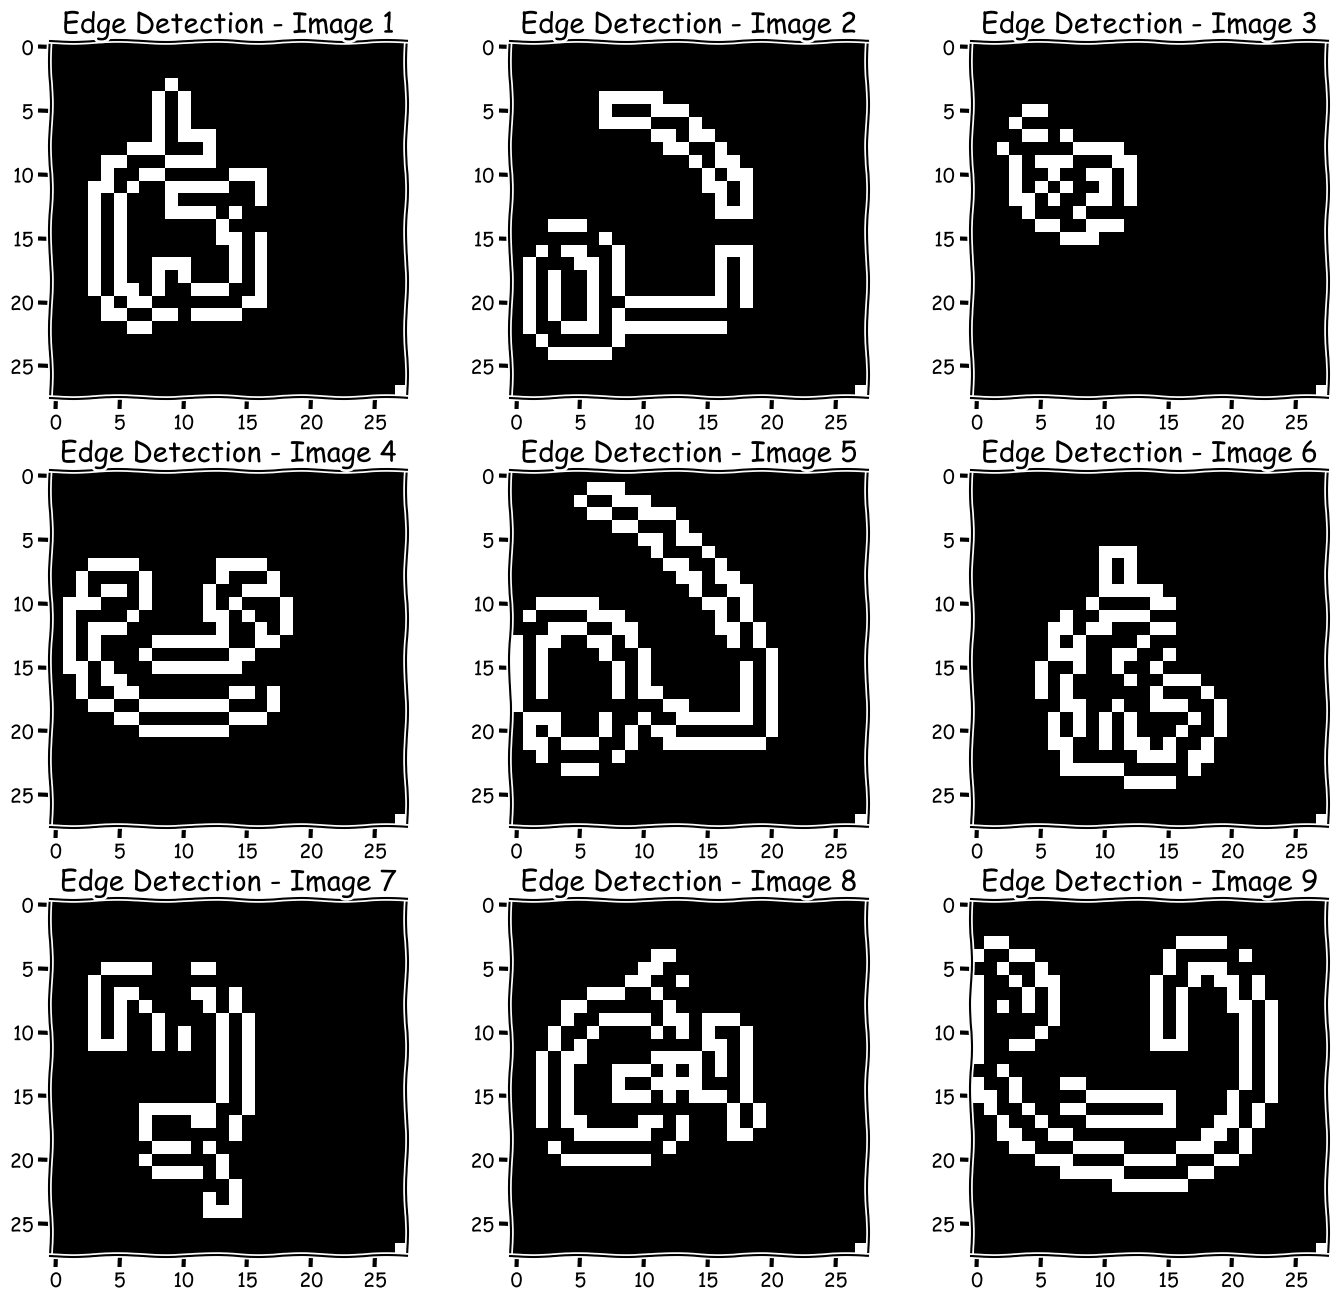

In [11]:
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import cv2
import numpy as np

plt.style.use('fivethirtyeight')
plt.xkcd()

shuff = shuffle(x_train[:100])  # Assuming you have defined x_train

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axes = ax.flatten()

for i in range(9):
    # Check if the image is already in grayscale (single-channel)
    if shuff[i].shape[-1] == 1:
        shuff_gray = shuff[i]
    else:
        # Convert the image to grayscale if it's not already
        shuff_gray = cv2.cvtColor(shuff[i], cv2.COLOR_BGR2GRAY)
    
    # Check the dimensions of the image
    if shuff_gray.shape[0] != 28 or shuff_gray.shape[1] != 28:
        shuff_gray = cv2.resize(shuff_gray, (28, 28))
    
    # Ensure the image data type is CV_8U
    shuff_gray = shuff_gray.astype(np.uint8)
    
    # Apply Canny edge detection
    edges = cv2.Canny(shuff_gray, 100, 100)  # Adjust the threshold values as needed
    
    axes[i].imshow(shuff_gray)
    axes[i].imshow(edges, cmap='gray')
    axes[i].set_title(f"Edge Detection - Image {i+1}")
    

plt.show()




In [12]:
# Reshaping the training & test dataset so that it can be put in the model
# Now we reshape the train & test image dataset so that they can be put in the model.
# New shape of train data: (297960, 28, 28, 1)
# New shape of test data: (74490, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (960, 28, 28, 1)
New shape of test data: (240, 28, 28, 1)


In [13]:
categorical_train = to_categorical(y_train, num_classes = 784, dtype = 'int')
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 784, dtype = 'int')
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (960, 784)
New shape of test labels: (240, 784)


In [14]:
# Define the model
my_model = Sequential()

my_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
my_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

my_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

my_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
my_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

my_model.add(Flatten())

my_model.add(Dense(64, activation="relu"))
my_model.add(Dropout(0.25))  # Added Dropout for regularization
my_model.add(BatchNormalization())  # Added Batch Normalization

my_model.add(Dense(128, activation="relu"))
my_model.add(Dropout(0.25))  # Added Dropout for regularization
my_model.add(BatchNormalization())  # Added Batch Normalization

my_model.add(Dense(784, activation="softmax"))

In [15]:
from keras.utils import to_categorical
import tensorflow
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)



In [16]:
unique_labels = np.unique(y_train)
num_classes = len(unique_labels)

# Check for out-of-range labels
out_of_range_labels = [label for label in unique_labels if label >= num_classes]

if out_of_range_labels:
    # Define a valid class label to which out-of-range labels will be reassigned
    valid_class = num_classes  # Choose a valid class label (e.g., the last class)

    # Reassign out-of-range labels to the valid class label
    for label in out_of_range_labels:
        y_train[y_train == label] = valid_class

# Now, 'y_train' contains correctefd labels with out-of-range labels reassigned to 'valid_class'


In [17]:
# Check for out-of-range labels
out_of_range_labels = [label for label in unique_labels if label >= num_classes]

if out_of_range_labels:
    # You can choose how to handle these out-of-range labels, e.g., by reassigning them to valid classes or removing samples with such labels.
    valid_class = num_classes
    # Example: Reassign out-of-range labels to a specific class
    for label in out_of_range_labels:
        y_train[y_train == label] = valid_class  # Replace with a valid class label

    # Alternatively, you can remove samples with out-of-range labels
    valid_samples = np.logical_not(np.isin(y_train, out_of_range_labels))
    x_train = x_train[valid_samples]
    y_train = y_train[valid_samples]


In [18]:
# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Compile the model
my_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = my_model.fit(
    datagen.flow(x_train, categorical_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,  # Adjust batch size
    epochs=50,  # Increase the number of epochs
    validation_data=(x_test, categorical_test),
    callbacks=[reduce_lr]
)

# Continue with evaluation, saving the model, and plotting accuracy/loss
#These modifications are just a starting point. The key is to experiment with different approaches and evaluate the model's performance at each step to determine which changes have the most significant impact on accuracy.

# Evaluate the model on test data
test_loss, test_accuracy = my_model.evaluate(x_test, categorical_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
30/30 [==============================] - 4s 62ms/step - loss: 6.6728 - accuracy: 0.0302 - val_loss: 8.3885 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
30/30 [==============================] - 1s 41ms/step - loss: 6.3470 - accuracy: 0.1958 - val_loss: 7.8446 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
30/30 [==============================] - 1s 44ms/step - loss: 5.7518 - accuracy: 0.4146 - val_loss: 4.7385 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
30/30 [==============================] - 1s 41ms/step - loss: 4.4789 - accuracy: 0.6302 - val_loss: 6.3855 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/50
30/30 [==============================] - 1s 42ms/step - loss: 2.6664 - accuracy: 0.7708 - val_loss: 0.9777 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 6/50
30/30 [==============================] - 1s 43ms/step - loss: 1.4550 - accuracy: 0.8073 - val_loss: 0.9282 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 7/50
30/30 [==============================] - 1s 42ms/

In [19]:
my_model.summary()
my_model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [20]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("\nThe training accuracy is :", history.history['accuracy'])
print("\nThe validation loss is :", history.history['val_loss'])
print("\nThe training loss is :", history.history['loss'])

The validation accuracy is : [0.0, 0.0, 0.0, 0.0, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526, 0.8041666746139526]

The training accuracy is : [0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


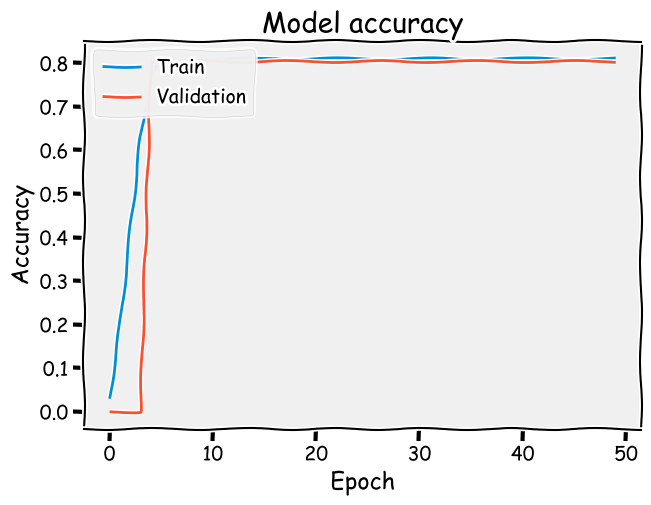

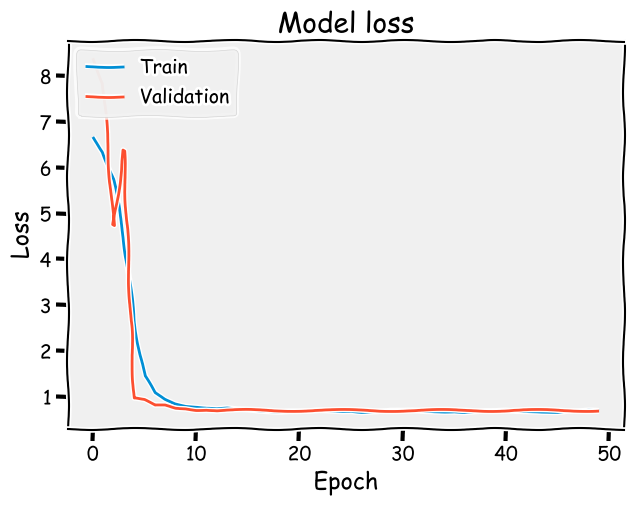

In [21]:
print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("model_hand.h5")
test_loss, test_accuracy = loaded_model.evaluate(x_test, categorical_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 11ms/step - loss: 0.7067 - accuracy: 0.8042
Test Loss: 0.7066794633865356
Test Accuracy: 0.8041666746139526


In [23]:
# Generate predictions for the test data
predictions = loaded_model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(categorical_test, axis=1)

# Compare predicted labels with true labels
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy on Test Data:", accuracy)

8/8 [==============================] - 1s 10ms/step
Accuracy on Test Data: 0.8041666666666667


In [24]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 251ms/step


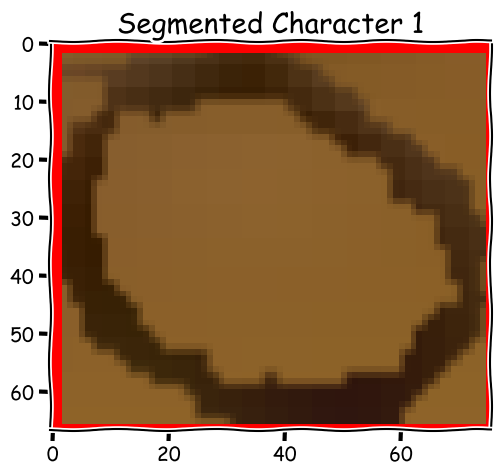

Segmented Character
1/1 [==============================] - 0s 55ms/step


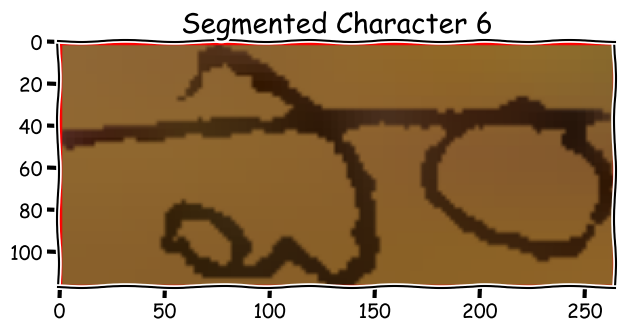

Segmented Character
1/1 [==============================] - 0s 39ms/step


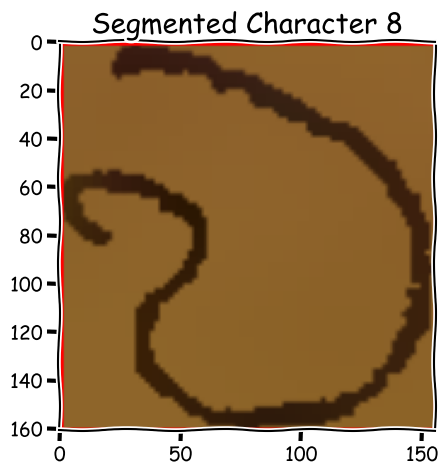

Segmented Character
1/1 [==============================] - 0s 38ms/step


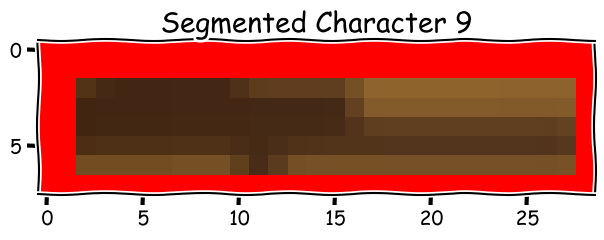

Segmented Character
1/1 [==============================] - 0s 39ms/step


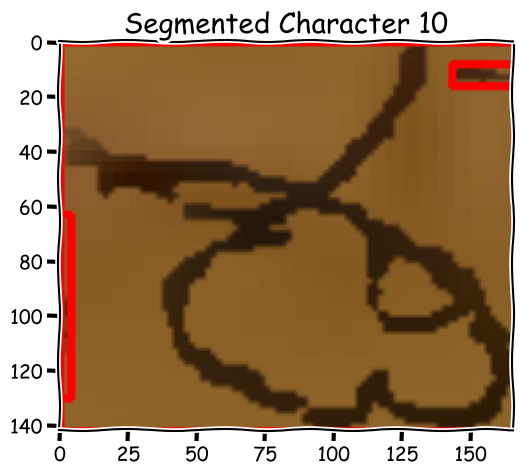

Segmented Character
1/1 [==============================] - 0s 47ms/step


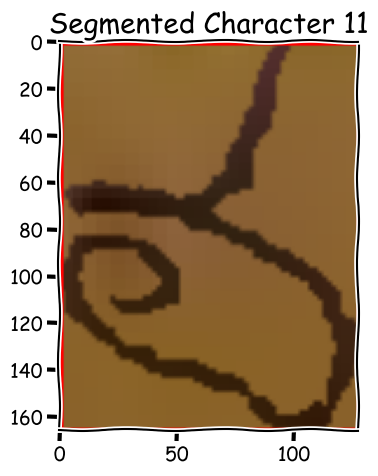

Segmented Character


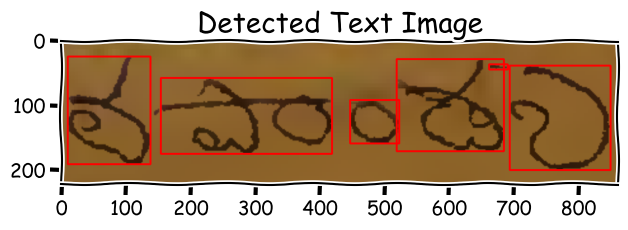

In [30]:
def preprocess_character(character_image):
    # Perform preprocessing steps on the character image
    # For example, resize the character to the input size expected by your model
    preprocessed_character = cv2.resize(character_image, (28, 28))
    preprocessed_character = cv2.cvtColor(preprocessed_character, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    preprocessed_character = preprocessed_character / 255.0  # Normalize pixel values
    preprocessed_character = np.expand_dims(preprocessed_character, axis=0)  # Add batch dimension
    preprocessed_character = np.expand_dims(preprocessed_character, axis=-1)  # Add channel dimension (1)
    return preprocessed_character


# Load your trained model for character recognition
model = keras.models.load_model('model_hand.h5')

# Load and preprocess the image for character segmentation
image_path = r'C:\\Users\\USER\\Desktop\\pakkodi project\\....png'
image = cv2.imread(image_path)
if image is None:
    print("Image not loaded. Check the image path.")
else:
    # Continue with image processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours in the preprocessed image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    characters = []

    # Create a directory to save the segmented images
    save_dir = 'segmented_characters'  # Define the save directory
    os.makedirs(save_dir, exist_ok=True)

    recognized_text = ""  # Initialize recognized text

    # Loop through the detected contours
    for i, contour in enumerate(contours):
        # Filter out small contours that might be noise
        if cv2.contourArea(contour) > 50:
            x, y, w, h = cv2.boundingRect(contour)
            character = image[y:y + h, x:x + w]

            # Preprocess the character image (resize, convert to grayscale, normalize, etc.)
            preprocessed_character = preprocess_character(character)

            # Perform character recognition using your model
            predicted_character = model.predict(preprocessed_character)

            # Draw rectangles around the segmented text with white lines
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # White rectangles

            # Save the segmented character image
            save_path = os.path.join(save_dir, f'character_{i}.png')
            cv2.imwrite(save_path, character)
            plt.title(f"Segmented Character {i}")
            plt.imshow(cv2.cvtColor(character, cv2.COLOR_BGR2RGB))
            plt.show()
            print(f"Segmented Character")

    # 'characters' now contains segmented character images
    # Segmented character images are saved in the 'segmented_characters' directory

    # Display the image with rectangles
    cv2.imshow("Image with Rectangles", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Display the detected text image
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Text Image")
    plt.show()